## MoM Figures of Thomas Conlon's smoking project (2m and 4m)

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# custom functions
import ma_scanpy as scc
import ma_codes as codes
from ma_codes import mysize, mymap, gray_red

Running Scanpy 1.7.1, on 2021-09-27 11:38.


In [2]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/MoM_2m+4m/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
## path variables
adata_path = '/mnt/platte_1/Projects/200217_SmokedMice_all/210218_Smoked_Mice_MNPs_refined_annotation_NIKLAS_loom.h5ad'

In [4]:
## load data
adata = sc.read(adata_path)

In [5]:
## explore meta data of adata object
adata

AnnData object with n_obs × n_vars = 17095 × 8393
    obs: 'air', 'condition', 'identifier', 'name', 'timepoint', 'n_counts', 'n_genes', 'percent.mito', 'QC_group', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain', 'louvain_2', 'cell_type', 'cell_type_condition', 'louvain_3', 'cell_type_nano', 'meta_cell_type', 'cell_type_refined', 'dcluster', 'sub_louvain', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'n_counts', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'cell_type_colors', 'cell_type_nano_colors', 'cell_type_refined_colors', 'condition_colors', 'dcluster_colors', 'dendrogram_louvain_2', 'hvg', 'louvain', 'louvain_1_colors', 'louvain_2_colors', 'louvain_3_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sub_louvain_colors', 'timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
   

In [6]:
adata.obs.cell_type.cat.categories

Index(['AM', 'CS-induced Inhba+/Spp1+ Macrophages',
       'CS-induced Inhba+/Lilr4b+/Tcirg1+ Macrophages', 'Lyve1+/Cd163+ IM',
       'Lyve1-/Cd163- IM', 'Prg4+ IM', 'Ly6c2+ classical Monocytes',
       'Ly6c2- non-classical Monocytes', 'Cd103+/Clec9a+ cDC',
       'Cd209+/Cd11b+ cDC', 'Fscn1+ DC'],
      dtype='object')

In [7]:
## only include 2m and 4m - to be consistent with experimental set up
adata = adata[adata.obs.timepoint.isin(['2 months','4 months'])].copy()
## remove outliers (< 10 cells)
adata = adata[-adata.obs.cell_type.isin(['CS-induced Inhba+/Lilr4b+/Tcirg1+ Macrophages',
                                        'Cd103+/Clec9a+ cDC',
                                         'Cd209+/Cd11b+ cDC',
                                         'Fscn1+ DC'])].copy() ## apart from a few outliers only present after 6 months

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [8]:
## add new meta column
# define labels
macrophage_cluster = ['AM', 
                      'CS-induced Inhba+/Spp1+ Macrophages',
                      'CS-induced Inhba+/Lilr4b+/Tcirg1+ Macrophages',
                      'Lyve1+/Cd163+ IM', 'Lyve1-/Cd163- IM', 'Prg4+ IM']
monocyte_cluster = ['Ly6c2- non-classical Monocytes', 'Ly6c2+ classical Monocytes']
granulocyte_cluster = ['Neutrophils', 'Basophils']

# add new meta data column
adata.obs['meta_cell_type'] = ['Macrophages' if ct in macrophage_cluster else ct for ct in adata.obs['cell_type']]
adata.obs['meta_cell_type'] = ['Monocytes' if ct in monocyte_cluster else ct for ct in adata.obs['meta_cell_type']]
adata.obs['meta_cell_type'] = adata.obs['meta_cell_type'].astype('category')
## check results
adata.obs['meta_cell_type'].value_counts()

Macrophages    7137
Monocytes       825
Name: meta_cell_type, dtype: int64

In [9]:
## re-calculate UMAP
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


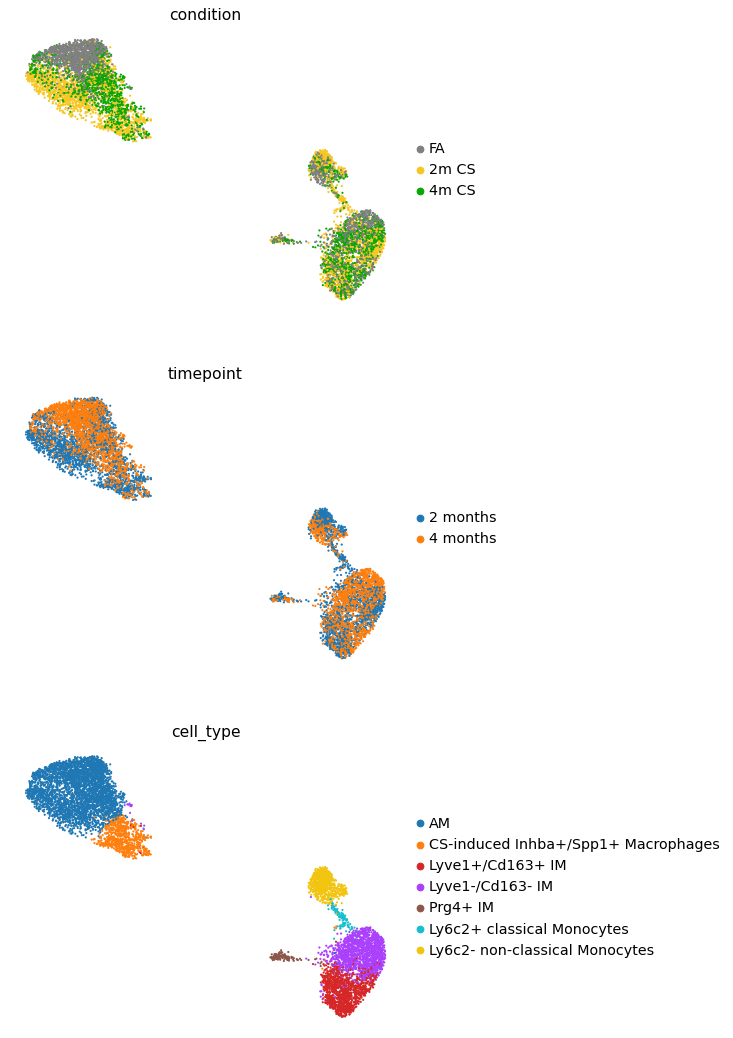

In [10]:
## plot UMAP
sc.pl.umap(adata, color = ['condition', 'timepoint','cell_type'],
           ncols = 1, frameon = False)

### MNP overview UMAPs

In [11]:
adata.obs.cell_type.cat.categories

Index(['AM', 'CS-induced Inhba+/Spp1+ Macrophages', 'Lyve1+/Cd163+ IM',
       'Lyve1-/Cd163- IM', 'Prg4+ IM', 'Ly6c2+ classical Monocytes',
       'Ly6c2- non-classical Monocytes'],
      dtype='object')

In [12]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.reorder_categories(['AM',
                                                                        'CS-induced Inhba+/Spp1+ Macrophages',
                                                                        'Lyve1+/Cd163+ IM',
                                                                        'Lyve1-/Cd163- IM',
                                                                        'Prg4+ IM',
                                                                        'Ly6c2- non-classical Monocytes',
                                                                        'Ly6c2+ classical Monocytes', 
                                                                        ])

In [13]:
celltype_colours = ['#65209b', # AM
                    '#ef6bf1', # CS-induced Inhba+/Lgals3+/Spp1+ Macrophages
                    '#fc9983', # Lyve1+/Cd163+ IM
                    '#d62728', # Lyve1-/Cd163- IM
                    '#ff7f0e', # Prg4+ IM
                    '#f1c40f', # Ly6c2- non-classical Monocytes
                    '#1e37d4', # Ly6c2+ classical Monocytes
                    '#bdecf0', # Cd209+/Cd11b+ cDC
                    '#bfe9ac', # Cd103+/Clec9a+ cDC
                    '#138310', # Fscn1+ DC
                   ]

In [14]:
### recalculate UMAP
#sc.pp.pca(adata, use_highly_variable = True)
#sc.pp.neighbors(adata, n_pcs = 50, n_neighbors = 20)
#sc.tl.umap(adata)

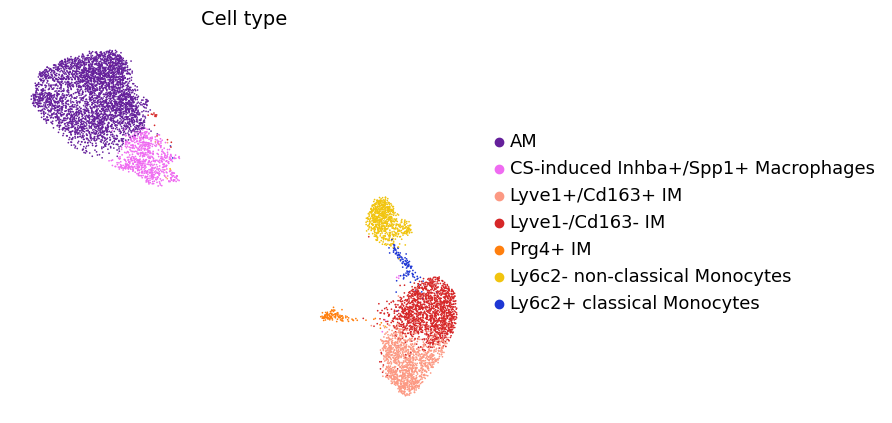

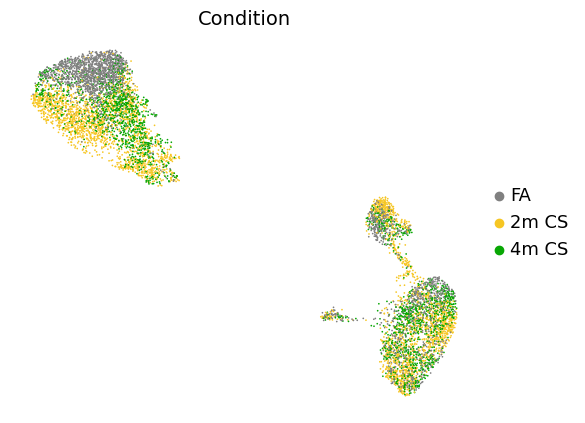

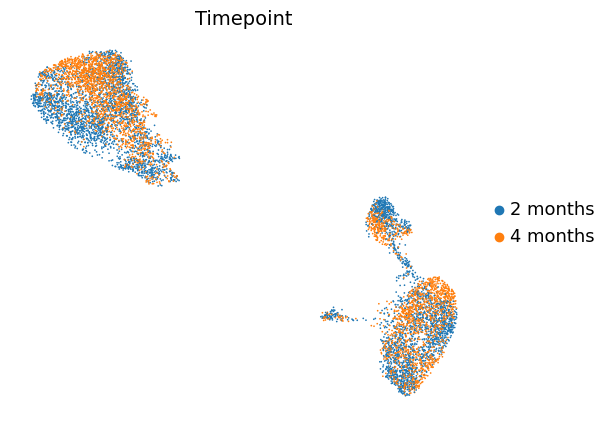

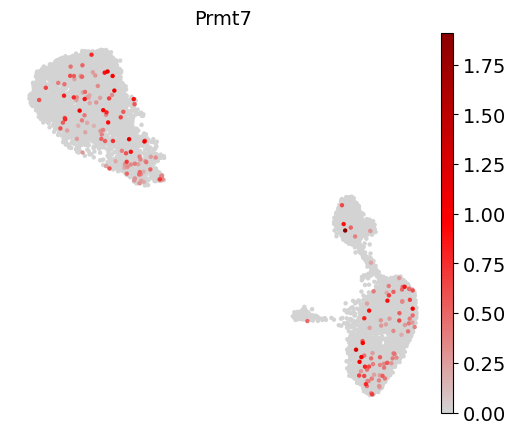

In [15]:
## save UMAPs of MNPs
sc.pl.umap(adata, color = ['cell_type'], title = 'Cell type', palette = celltype_colours, frameon = False, 
           ax = mysize(6, 5, 100), size = 6,save = '_celltype.pdf')
sc.pl.umap(adata, color = ['condition'], title = 'Condition', frameon = False, 
           ax = mysize(6, 5, 100), size = 6, save = '_condition.pdf')
sc.pl.umap(adata, color = ['timepoint'], title = 'Timepoint', frameon = False, 
           ax = mysize(6, 5, 100), size = 6, save = '_timepoint.pdf')
sc.pl.umap(adata, color = ['Prmt7'], frameon = False, cmap = gray_red,
           ax = mysize(6, 5, 100), size = 40, save = '_Prmt7.pdf')

### Supplementary Figure 3b: MoM marker gene heatmap

In [16]:
## compute marker
sc.tl.rank_genes_groups(adata, groupby = 'cell_type', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


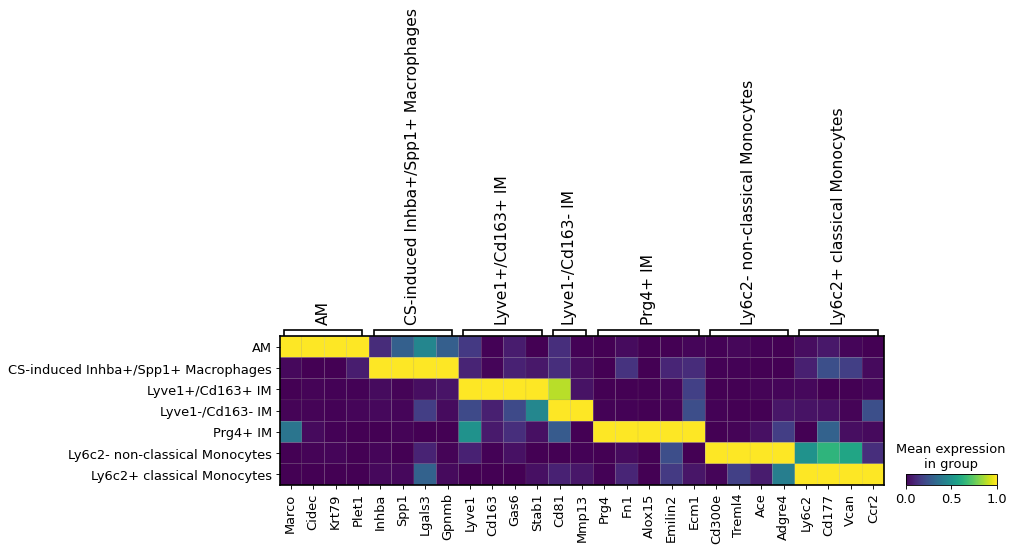

In [17]:
## curated heatmap
celltype_markers={'AM' : ['Marco','Cidec','Krt79','Plet1'],
                  'CS-induced Inhba+/Spp1+ Macrophages' : ['Inhba','Spp1','Lgals3','Gpnmb'],
                  'Lyve1+/Cd163+ IM' :  ['Lyve1','Cd163','Gas6','Stab1'],
                  'Lyve1-/Cd163- IM' : ['Cd81','Mmp13'],
                  'Prg4+ IM' : ['Prg4','Fn1','Alox15','Emilin2','Ecm1'],
                  'Ly6c2- non-classical Monocytes' : ['Cd300e','Treml4','Ace','Adgre4'],
                  'Ly6c2+ classical Monocytes' : ['Ly6c2','Cd177','Vcan','Ccr2']
}

sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type',standard_scale='var',
                 dendrogram=False, save='curated_marker_matrix.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type']`


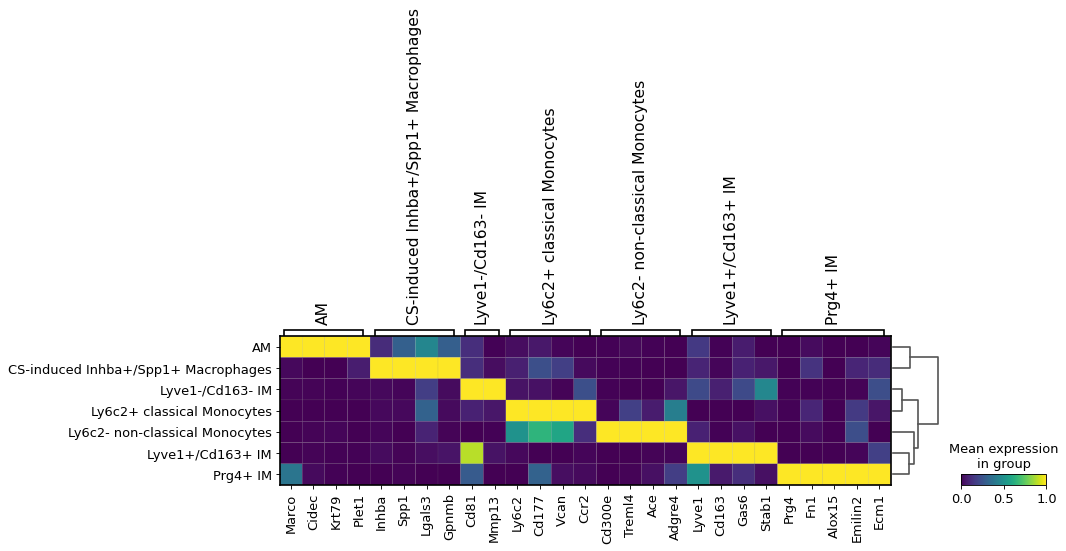

In [18]:
## curated heatmap with dendrogram
sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type',standard_scale='var',
                 dendrogram=True, save='curated_marker_matrix_dendrogram.pdf')

### MNP frequency plots

In [19]:
## frequency table
xlabel = 'condition'
cell_types_label = 'cell_type'
cols = adata.uns['%s_colors' %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = codes.calc_relFreq(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

,AM,CS-induced Inhba+/Spp1+ Macrophages,Lyve1+/Cd163+ IM,Lyve1-/Cd163- IM,Prg4+ IM,Ly6c2- non-classical Monocytes,Ly6c2+ classical Monocytes,condition
muc13913,0.374532,0.149813,0.134831,0.220974,0.011236,0.073658,0.034956,2m CS
muc13914,0.482341,0.140262,0.146317,0.131181,0.005045,0.082745,0.012109,2m CS


Saving Figure to /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/MoM_2m+4m/relfreqs_condition.pdf


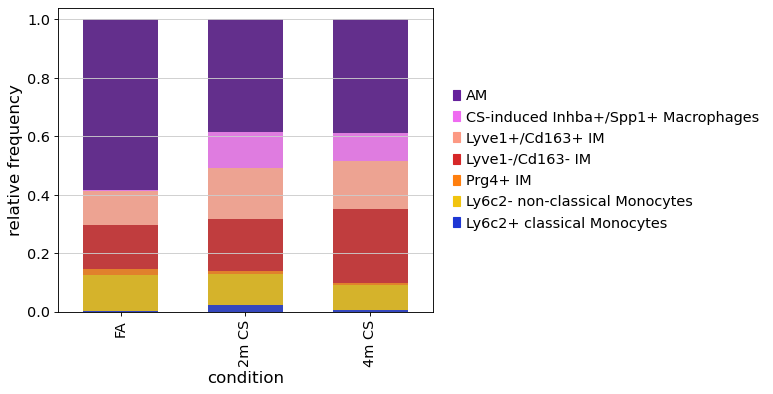

In [20]:
## cell type frequencies per treatment category
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (6,5), order = ['FA','2m CS','4m CS'],
                               errbar = False, cols = cols, width = 0.6,
                               save='/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/MoM_2m+4m/relfreqs_condition.pdf')

In [21]:
## frequency table
xlabel = 'timepoint'
cell_types_label = 'cell_type'
cols = adata.uns['%s_colors' %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = codes.calc_relFreq(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

,AM,CS-induced Inhba+/Spp1+ Macrophages,Lyve1+/Cd163+ IM,Lyve1-/Cd163- IM,Prg4+ IM,Ly6c2- non-classical Monocytes,Ly6c2+ classical Monocytes,timepoint
muc13913,0.374532,0.149813,0.134831,0.220974,0.011236,0.073658,0.034956,2 months
muc13914,0.482341,0.140262,0.146317,0.131181,0.005045,0.082745,0.012109,2 months


Saving Figure to /home/niklas/projects/macrophages_smoking_THOMAS/02_figures/MoM_2m+4m/relfreqs_timepoint.pdf


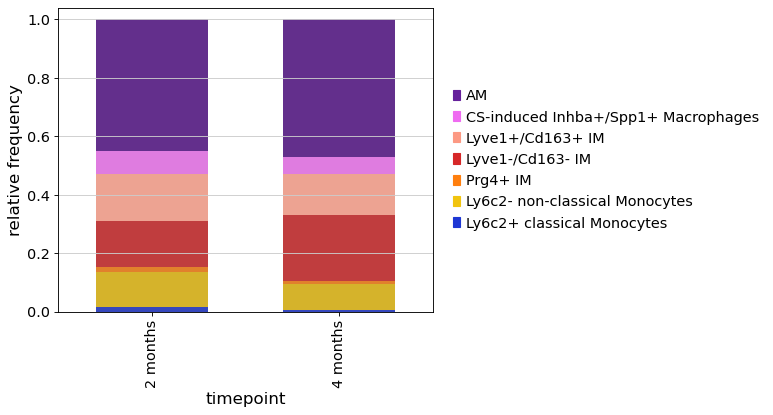

In [22]:
## cell type frequencies per treatment category
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (6,5), order = ['2 months', '4 months'],
                               errbar = False, cols = cols, width = 0.6,
                               save='/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/MoM_2m+4m/relfreqs_timepoint.pdf')

### MNP boxplots

In [23]:
xlabel = 'timepoint'                           ## Where time information is stored
group_by = 'cell_type'                   ## Where cluster label is stored, usually "louvain"
condition = 'condition'                       ## If you have a label to split by, else None
cols = adata.uns['%s_colors' %condition]  ## an also be given manually e.g. ["red", "gray"]

relFreqs = codes.calc_relFreq(adata, group_by = group_by, xlabel = xlabel, condition = condition)
relFreqs.head(4)

,AM,CS-induced Inhba+/Spp1+ Macrophages,Lyve1+/Cd163+ IM,Lyve1-/Cd163- IM,Prg4+ IM,Ly6c2- non-classical Monocytes,Ly6c2+ classical Monocytes,timepoint,condition
muc13913,0.374532,0.149813,0.134831,0.220974,0.011236,0.073658,0.034956,2 months,2m CS
muc13914,0.482341,0.140262,0.146317,0.131181,0.005045,0.082745,0.012109,2 months,2m CS
muc13915,0.325549,0.138736,0.182692,0.185440,0.021978,0.097527,0.048077,2 months,2m CS
muc13916,0.393814,0.104124,0.194845,0.176289,0.016495,0.095876,0.018557,2 months,2m CS


In [24]:
relFreqs['condition'] = relFreqs['condition'].astype('category')
relFreqs['condition'] = relFreqs['condition'].cat.reorder_categories(['FA','2m CS','4m CS'])

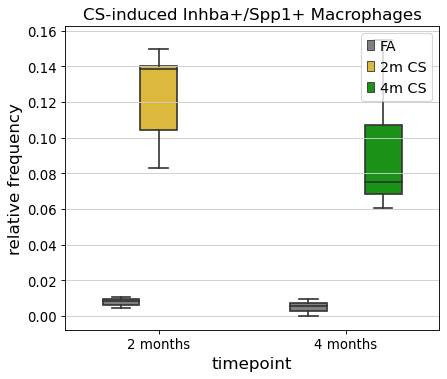

In [25]:
## boxplot of Smoke-induced Macrophages per timepoint
cluster = 'CS-induced Inhba+/Spp1+ Macrophages'
order = adata.obs[xlabel].cat.categories
codes.plot_relFreq(relFreqs, cluster = cluster, cols = cols, order = order, xlabel = xlabel, condition = condition,
                   figsize = (6, 5), width = 0.6,
                  save='/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/MoM_2m+4m/boxplot_cs_induced_mac_timepoint.pdf')

### MNP dotplots of Prmt7 expression

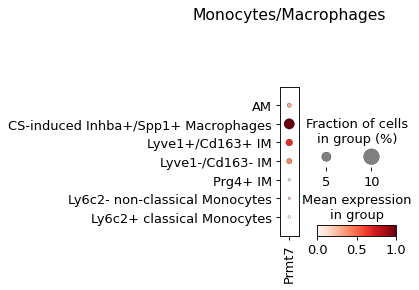

In [26]:
## Prmt7 expression across cell types
sc.pl.dotplot(adata, var_names = ['Prmt7'], groupby = 'cell_type', title = 'Monocytes/Macrophages', standard_scale = 'var',
             save = 'MoM_Prmt7_expression.pdf')

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


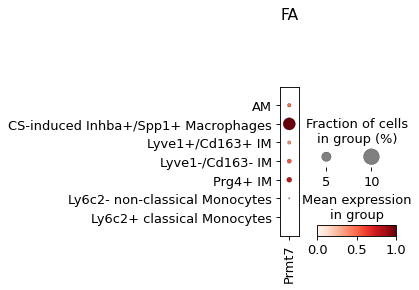

In [27]:
## Prmt7 expression across cell types - FA only
sc.pl.dotplot(adata[adata.obs.condition.isin(['FA'])], var_names = ['Prmt7'], groupby = 'cell_type', title = 'FA', standard_scale = 'var',
             save = 'MoM_Prmt7_expression_FA.pdf')

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


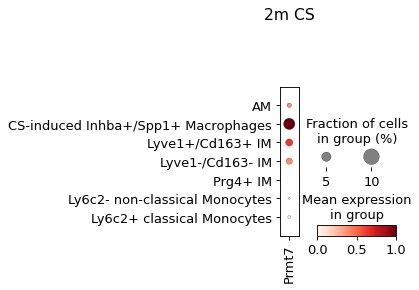

In [28]:
## Prmt7 expression across cell types - 2m CS only
sc.pl.dotplot(adata[adata.obs.condition.isin(['2m CS'])], var_names = ['Prmt7'], groupby = 'cell_type', title = '2m CS', standard_scale = 'var',
             save = 'MoM_Prmt7_expression_2mCS.pdf')

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


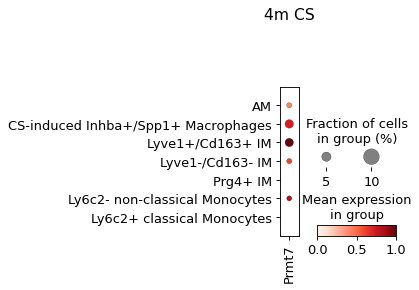

In [29]:
## Prmt7 expression across cell types - 4m CS only
sc.pl.dotplot(adata[adata.obs.condition.isin(['4m CS'])], var_names = ['Prmt7'], groupby = 'cell_type', title = '4m CS', standard_scale = 'var',
             save = 'MoM_Prmt7_expression_4mCS.pdf')

In [30]:
## save this adata for later use
adata.write('/mnt/platte_1/Projects/200217_SmokedMice_all/210429_Smoked_Mice_MoM_refined_annotation_NIKLAS_loom.h5ad')